In [1]:
import sys
sys.path.append("../src/")
from ECALDataAnalyzer import ECALDataAnalyzer
#from plot_tools_ecal import plot_ecal_peaks, plot_ecal_peaks_with_intersections
from TrainData import TrainData
import pandas as pd

2024-08-26 10:35:02.240292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-26 10:35:03.120164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2024-08-26 10:35:03.120302: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/usr/local/nvidia/lib:/us

In [2]:
ana = ECALDataAnalyzer(input_filename = '/w/hallb-scshelf2102/clas12/users/gmat/clas12/coatjava_dev/coatjava/playground/output/08_20_2024_0002/cooked.hipo',
                       output_filename = 'output.csv')
ana.process_hipo()

101it [00:03, 25.67it/s]

Processing complete.


In [4]:
df = pd.read_csv("output.csv")
df

,event_number,id,mc_pid,otid,sector,layer,energy,time,xo,yo,zo,xe,ye,ze,rec_pid,pindex
0,0,127.0,11.0,1.0,2.0,8.0,0.001760,175.263306,25.676394,83.929665,806.192749,345.591431,272.589478,655.416016,-1.0,-1.0
1,0,136.0,11.0,1.0,3.0,1.0,0.005240,151.323639,-16.814390,72.248131,754.974548,-53.080719,51.309753,754.974548,22.0,5.0
2,0,122.0,11.0,1.0,3.0,1.0,0.007907,152.389633,-17.084021,100.348335,743.563843,-77.281403,65.593361,743.563843,22.0,2.0
3,0,126.0,11.0,1.0,3.0,1.0,0.001433,151.624283,-17.128958,105.031708,741.662048,-81.314842,67.973969,741.662048,22.0,2.0
4,0,166.0,11.0,1.0,3.0,1.0,0.001967,149.796356,-17.173897,109.715073,739.760254,-85.348289,70.354568,739.760254,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,99,77.0,211.0,4.0,6.0,8.0,0.003700,169.712097,227.302063,-164.273758,726.737244,228.935745,-341.332520,654.853943,2112.0,5.0
4921,99,67.0,211.0,4.0,6.0,9.0,0.002480,183.993652,248.586441,-331.066711,655.784058,26.937840,-200.356430,760.247559,2112.0,5.0
4922,99,68.0,211.0,4.0,6.0,9.0,0.001510,182.242920,258.371552,-325.417267,655.784058,26.831894,-188.874054,764.909241,2112.0,5.0
4923,100,5.0,22.0,5.0,5.0,1.0,0.001347,149.020157,-285.950531,-187.605972,645.638977,-20.344973,-340.953400,645.638977,-1.0,-1.0


No Intersection: Not all points are within the circle.


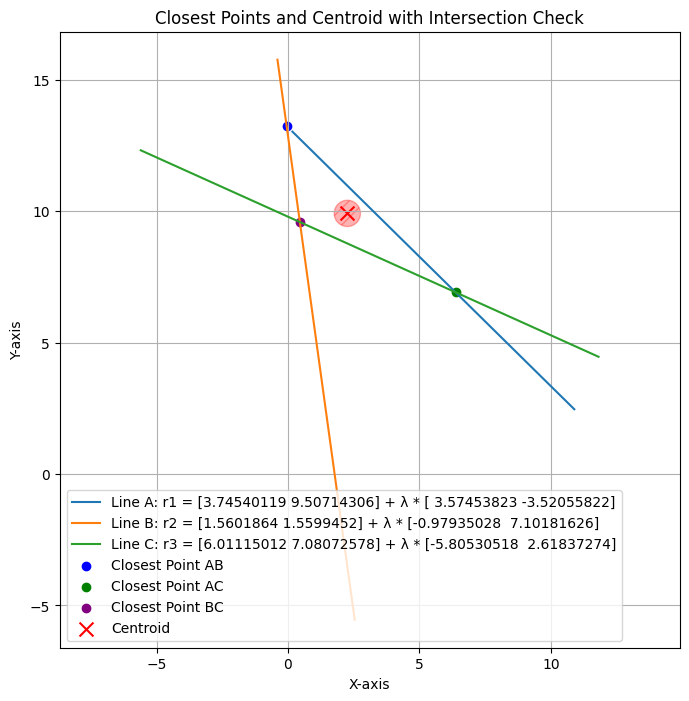

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def closest_point_between_lines(a1, b1, a2, b2):
    b1 = b1 / np.linalg.norm(b1)
    b2 = b2 / np.linalg.norm(b2)
    a_diff = a2 - a1
    det = b1[0] * b2[1] - b1[1] * b2[0]
    
    if np.isclose(det, 0):
        lambda_1 = np.dot(a_diff, b1)
        closest_point_1 = a1 + lambda_1 * b1
        return closest_point_1
    else:
        lambda_ = (a_diff[0] * b2[1] - a_diff[1] * b2[0]) / det
        closest_point = a1 + lambda_ * b1
        return closest_point

# Points and direction vectors from the previous example
a1, b1 = np.array([3.74540119, 9.50714306]), np.array([7.31993942, 5.98658484]) - np.array([3.74540119, 9.50714306])
a2, b2 = np.array([1.5601864 , 1.5599452]), np.array([0.58083612, 8.66176146]) - np.array([1.5601864 , 1.5599452])
a3, b3 = np.array([6.01115012, 7.08072578]), np.array([0.20584494, 9.69909852]) - np.array([6.01115012, 7.08072578])

# Calculate the closest points between each pair of lines
closest_point_AB = closest_point_between_lines(a1, b1, a2, b2)
closest_point_AC = closest_point_between_lines(a1, b1, a3, b3)
closest_point_BC = closest_point_between_lines(a2, b2, a3, b3)

# Calculate the centroid of the three points
centroid = (closest_point_AB + closest_point_AC + closest_point_BC) / 3

# Plot the lines
lambda_values = np.linspace(-1, 2, 100)

line1_x = a1[0] + lambda_values * b1[0]
line1_y = a1[1] + lambda_values * b1[1]

line2_x = a2[0] + lambda_values * b2[0]
line2_y = a2[1] + lambda_values * b2[1]

line3_x = a3[0] + lambda_values * b3[0]
line3_y = a3[1] + lambda_values * b3[1]

plt.figure(figsize=(8, 8))
plt.plot(line1_x, line1_y, label=f"Line A: r1 = {a1} + λ * {b1}")
plt.plot(line2_x, line2_y, label=f"Line B: r2 = {a2} + λ * {b2}")
plt.plot(line3_x, line3_y, label=f"Line C: r3 = {a3} + λ * {b3}")

# Plot the closest points
plt.scatter(*closest_point_AB, color='blue', marker='o', label='Closest Point AB')
plt.scatter(*closest_point_AC, color='green', marker='o', label='Closest Point AC')
plt.scatter(*closest_point_BC, color='purple', marker='o', label='Closest Point BC')

# Plot the centroid
plt.scatter(*centroid, color='red', marker='x', s=100, label='Centroid')

# Draw the circle at the centroid with radius R = 0.5
circle = plt.Circle(centroid, radius=0.5, color='red', fill=True, alpha=0.3, hatch='//')
plt.gca().add_patch(circle)

# Check if all points are within the circle
R = 0.5
distances = [np.linalg.norm(closest_point_AB - centroid),
             np.linalg.norm(closest_point_AC - centroid),
             np.linalg.norm(closest_point_BC - centroid)]

if all(distance <= R for distance in distances):
    print("Intersection: All points are within the circle.")
else:
    print("No Intersection: Not all points are within the circle.")

# Formatting the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Closest Points and Centroid with Intersection Check')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Show the plot
plt.show()

In [6]:
import numpy as np

def closest_point_between_lines(a1, b1, a2, b2):
    """
    Calculate the (x, y) coordinates of the closest point between two lines.
    Line 1: r1 = a1 + lambda * b1
    Line 2: r2 = a2 + mu * b2

    Parameters:
    - a1, b1: Vectors defining line 1
    - a2, b2: Vectors defining line 2

    Returns:
    - closest_point: (x, y) coordinates of the closest point between the two lines
    """
    # Normalize the direction vectors
    b1 = b1 / np.linalg.norm(b1)
    b2 = b2 / np.linalg.norm(b2)

    # Calculate the vector between the two points on each line
    a_diff = a2 - a1

    # Calculate the determinants
    det = b1[0] * b2[1] - b1[1] * b2[0]
    
    if np.isclose(det, 0):
        # Lines are parallel, no unique intersection point
        # Return the midpoint of the closest points on the lines
        lambda_1 = np.dot(a_diff, b1)
        closest_point_1 = a1 + lambda_1 * b1
        return closest_point_1
    else:
        # Calculate lambda and mu using Cramer's rule
        lambda_ = (a_diff[0] * b2[1] - a_diff[1] * b2[0]) / det
        mu = (a_diff[0] * b1[1] - a_diff[1] * b1[0]) / det
        
        # Calculate the closest points on both lines
        closest_point = a1 + lambda_ * b1
        
        return closest_point

# Using the same points from the previous code
a1, b1 = np.array([3.74540119, 9.50714306]), np.array([7.31993942, 5.98658484]) - np.array([3.74540119, 9.50714306])
a2, b2 = np.array([1.5601864 , 1.5599452]), np.array([0.58083612, 8.66176146]) - np.array([1.5601864 , 1.5599452])
a3, b3 = np.array([6.01115012, 7.08072578]), np.array([0.20584494, 9.69909852]) - np.array([6.01115012, 7.08072578])

# Calculate the closest points between each pair of lines
closest_point_AB = closest_point_between_lines(a1, b1, a2, b2)
closest_point_AC = closest_point_between_lines(a1, b1, a3, b3)
closest_point_BC = closest_point_between_lines(a2, b2, a3, b3)

print(f"Closest point between Line A and Line B: {closest_point_AB}")
print(f"Closest point between Line A and Line C: {closest_point_AC}")
print(f"Closest point between Line B and Line C: {closest_point_BC}")


Closest point between Line A and Line B: [-0.05142375 13.24663119]
Closest point between Line A and Line C: [6.37619186 6.91608063]
Closest point between Line B and Line C: [0.45316891 9.58754774]
